In [1]:
import pylab
import numpy as np
np.seterr(all='raise')
np.random.seed(13)
import scipy as sp
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('text', usetex=True)
%matplotlib inline
from tqdm import tqdm

from sklearn import datasets

In [2]:
def calc_error(res,e,names=[]):
    tmp_i = np.zeros(len(res.x))
    etol = e * max(1, abs(res.fun))
    for i in range(len(res.x)):
        tmp_i[i] = 1.0
        hess_inv_i = res.hess_inv(tmp_i)[i]
        uncertainty_i = np.sqrt(etol * hess_inv_i)
        tmp_i[i] = 0.0
        if len(names) > 0:
            print('{0} = {1:12.4e} ± {2:.1e}'.format(names[i], res.x[i], uncertainty_i))
        else:
            print('x^{0} = {1:12.4e} ± {2:.1e}'.format(i, res.x[i], uncertainty_i))

# Revisar bases de datos conocidas
[SciKit Learn](https://scikit-learn.org/stable/datasets/index.html)
<!-- X,Y = datasets.load_boston(return_X_y=True) -->

In [3]:
datasets.load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
A = pd.DataFrame(datasets.load_boston().data, columns=datasets.load_boston().feature_names)
b = pd.DataFrame(datasets.load_boston().target, columns=["MEDV"])

In [5]:
A

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


$$X = x_1+x_2+x_3+\dots$$
Mi intención,
$$CRIM\times x_1+ZN\times x_2+INDUS\times x_3+\dots = b$$

In [6]:
Anumpy = np.matrix(A.to_numpy(dtype=np.float64))
bnumpy = np.matrix(b.to_numpy(dtype=np.float64))

In [7]:
# %%timeit
X_opt = np.linalg.inv(Anumpy.T*Anumpy)*Anumpy.T*bnumpy

In [8]:
print(X_opt.T)

[[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
  -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
   1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
  -4.16304471e-01]]


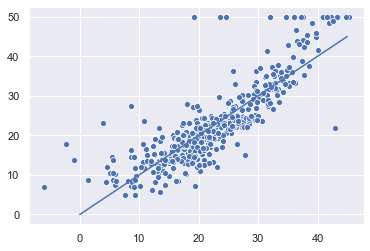

In [9]:
sns.scatterplot(np.array(Anumpy*X_opt).flatten(),np.array(bnumpy).flatten())
plt.plot([0,45],[0,45])

In [10]:
predicciones = np.array(Anumpy*X_opt).flatten()

In [11]:
observaciones = np.array(bnumpy).flatten()
bbarrita = observaciones.mean()

In [12]:
r2 = 1-(np.linalg.norm(predicciones - observaciones)**2)/(np.linalg.norm(observaciones - bbarrita)**2)

In [13]:
r2

0.7137381380515405

# Implementemos nuestro algoritmo de Optimización por Newton Raphson
La idea es encontrar $X_{opt}$ de forma iterativa sin invertir la matriz

In [14]:
# Definamos la func de costo (debe devolver un escalar)
def L(x,A,b):
    # (b_pred-b_obs)^2
    # m es el numero de datos
    # n es el numero de parametros == 13
    m,n = A.shape
    X = np.matrix(x).T
    DeltaB=(A*X-b)
    return (DeltaB.T*DeltaB)[0,0]/m
def dLdx(x,A,b):
    # (b_pred-b_obs)^2
    # m es el numero de datos
    # n es el numero de parametros == 13
    m,n = A.shape
    X = np.matrix(x).T
    DeltaB=(A*X-b)
    return (2/m)*np.array(A.T*DeltaB).flatten()

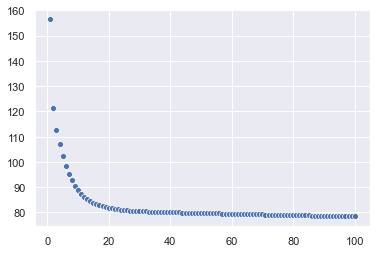

In [15]:
# encontrar una forma iterativa de actualizar X para ir minimizando la funcion de costo L
x = np.zeros(Anumpy.shape[1])
epsilon = 2e-6
cost = []
N = 100
for it in range(N):
    x = x - epsilon*dLdx(x,Anumpy,bnumpy)
    cost.append(L(x,Anumpy,bnumpy))
sns.scatterplot(np.arange(N)+1,cost)
# plt.xscale('log')
# plt.yscale('log')

In [16]:
L(np.array(X_opt).flatten(),Anumpy,bnumpy)

24.166099330126485

In [17]:
np.array(X_opt).flatten()

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [37]:
e=1e-10

In [38]:
# %%timeit
res1 = sp.optimize.minimize(fun=L,jac=dLdx, x0=np.zeros(Anumpy.shape[1]), args = (Anumpy,bnumpy), method='Newton-CG', tol=e)
res1

     fun: 24.166099330126485
     jac: array([-9.90621621e-08, -7.63123033e-08, -1.38951916e-07, -1.10127740e-09,
       -1.63231711e-09, -5.59425496e-08, -9.66836222e-07, -5.08054020e-08,
       -1.95242821e-07, -5.70650044e-06, -2.09325323e-07, -3.59471165e-06,
       -1.51435581e-07])
 message: "Warning: CG iterations didn't converge.  The Hessian is not positive definite."
    nfev: 43
    nhev: 0
     nit: 13
    njev: 1487
  status: 3
 success: False
       x: array([-9.28965171e-02,  4.87149553e-02, -4.05998238e-03,  2.85399881e+00,
       -2.86843587e+00,  5.92814777e+00, -7.26933564e-03, -9.68514162e-01,
        1.71151127e-01, -9.39621547e-03, -3.92190927e-01,  1.49056102e-02,
       -4.16304472e-01])

In [39]:
res2 = sp.optimize.minimize(fun=L,jac=dLdx, x0=np.zeros(Anumpy.shape[1]), args = (Anumpy,bnumpy), method='L-BFGS-B', tol=e)
res2

      fun: 24.16610332359568
 hess_inv: <13x13 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.10795262e-03,  4.02014963e-03,  7.22091444e-04, -4.28136790e-04,
       -2.19997590e-05,  2.83232491e-03,  1.52216335e-02,  4.29023449e-04,
       -1.57560360e-03,  7.36869496e-02,  5.09664852e-03,  7.08257101e-02,
        2.33228979e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1501
      nit: 1307
   status: 0
  success: True
        x: array([-9.28796918e-02,  4.87081986e-02, -4.00770730e-03,  2.85065029e+00,
       -2.89047831e+00,  5.93013071e+00, -7.26609601e-03, -9.69147875e-01,
        1.71021548e-01, -9.38864900e-03, -3.92251277e-01,  1.49033981e-02,
       -4.16162475e-01])

In [40]:
L(res1.x,Anumpy,bnumpy)

24.166099330126485

In [41]:
L(res2.x,Anumpy,bnumpy)

24.16610332359568

In [42]:
L(np.array(X_opt).flatten(),Anumpy,bnumpy)

24.166099330126485

In [43]:
calc_error(res2,e,names=[])

x^0 =  -9.2880e-02 ± 6.3e-05
x^1 =   4.8708e-02 ± 2.4e-04
x^2 =  -4.0077e-03 ± 5.4e-04
x^3 =   2.8507e+00 ± 1.2e-02
x^4 =  -2.8905e+00 ± 5.2e-02
x^5 =   5.9301e+00 ± 2.4e-03
x^6 =  -7.2661e-03 ± 3.6e-04
x^7 =  -9.6915e-01 ± 3.6e-03
x^8 =   1.7102e-01 ± 1.1e-03
x^9 =  -9.3886e-03 ± 6.0e-05
x^10 =  -3.9225e-01 ± 3.3e-03
x^11 =   1.4903e-02 ± 2.6e-05
x^12 =  -4.1616e-01 ± 1.5e-03


# Fit a funciones no lineales

In [14]:
print("Nuestra caja experimental!")
a = 3/2
b = 4
c = -3
N=100
x = np.linspace(0.2,10,N)
y = a/(1+np.exp(c*(x-b)))
x1 = x + np.random.exponential(0.01,size=N)
y1 = y + np.random.normal(0,0.05,size=N)
x2 = x + np.random.normal(0,0.03,size=N)
y2 = y + np.random.exponential(0.05,size=N)

Nuestra caja experimental!


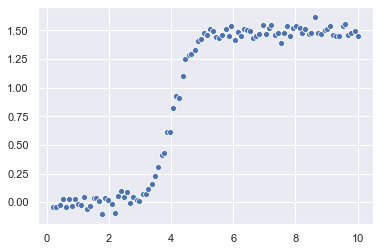

In [15]:
sns.scatterplot(x1,y1)

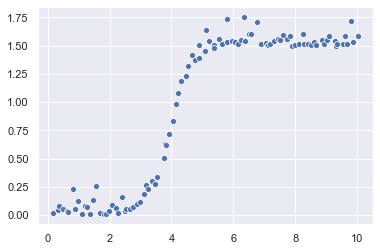

In [16]:
sns.scatterplot(x2,y2)

# ¿Cómo hacer el fit a la función?
$$f(x) = a\frac{1}{1+e^{bx+c}}$$

In [17]:
#como encuentro yo a, b y c?
# cual seria nuestra funcion de costo
def f(parametros,x):
    return parametros[0]/(1+np.exp(parametros[1]*x+parametros[2]))
def Lfit(parametros,x,y):
    # L = promedio sobre todos los puntos (f(a,b,c;x)-y)^2
    # parametros np.array([a,b,c])
    deltaY=f(parametros,x) - y
    return np.dot(deltaY,deltaY)/len(y)

In [18]:
print("Ajuste para el primer set: x1,y1")
e=1e-8
# ansatz: a=1,b=0,c=0
res1 = sp.optimize.minimize(fun=Lfit, x0=np.array([1,0,0]), args = (x1,y1), method='L-BFGS-B', tol=e)
res1

Ajuste para el primer set: x1,y1


      fun: 0.0017876424455565856
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.59038796e-06, -1.41143607e-06, -3.86366286e-07])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 136
      nit: 28
   status: 0
  success: True
        x: array([ 1.49140862, -3.1636231 , 12.74767141])

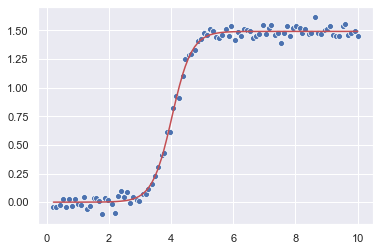

In [19]:
y1_pred = f(res1.x,x1)
sns.scatterplot(x1,y1)
plt.plot(x1,y1_pred,color='r')

In [20]:
r2 = 1-np.sum((y1_pred-y1)**2)/np.sum((y1-y1.mean())**2)
r2

0.9961350886200144

In [21]:
calc_error(res1,e,names=['a','b','c'])

a =   1.4914e+00 ± 1.0e-04
b =  -3.1636e+00 ± 7.0e-04
c =   1.2748e+01 ± 3.4e-03


# ¿Cómo hacer el fit a la función?
$$f(x) = a + b\tanh(cx+d)$$

In [22]:
#como encuentro yo a, b y c?
# cual seria nuestra funcion de costo
def ftilde(parametros,x):
    return parametros[0]+parametros[1]*np.tanh(parametros[2]*x+parametros[3])
def Lfit(parametros,x,y):
    # L = promedio sobre todos los puntos (f(a,b,c,d;x)-y)^2
    # parametros np.array([a,b,c,d])
    deltaY=ftilde(parametros,x) - y
    return np.dot(deltaY,deltaY)/len(y)

In [23]:
print("Ajuste para el primer set: x1,y1")
e=1e-8
# ansatz: a=0,b=1,c=0,d=0
res1 = sp.optimize.minimize(fun=Lfit, x0=np.array([0,1,0,0]), args = (x1,y1), method='L-BFGS-B', tol=e)
res1

Ajuste para el primer set: x1,y1


      fun: 0.0017821404271996211
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.09733618e-07,  1.94917867e-07, -1.11393100e-06, -2.76471554e-07])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 180
      nit: 29
   status: 0
  success: True
        x: array([ 0.74355278,  0.74804736,  1.57053162, -6.32404915])

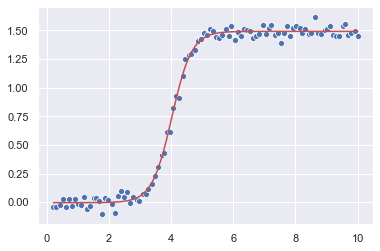

In [24]:
y1_pred = ftilde(res1.x,x1)
sns.scatterplot(x1,y1)
plt.plot(x1,y1_pred,color='r')

In [25]:
r2 = 1-np.sum((y1_pred-y1)**2)/np.sum((y1-y1.mean())**2)
r2

0.996146984071151

In [26]:
calc_error(res1,e,names=['a','b','c','d'])

a =   7.4355e-01 ± 1.1e-04
b =   7.4805e-01 ± 9.7e-05
c =   1.5705e+00 ± 3.9e-04
d =  -6.3240e+00 ± 1.7e-03
